## 1. Consolidated files in the unique DataFrame and show the total files extracted

In [11]:
import pandas as pd

all_files = pd.read_pickle("../etl/views/" + "dataset.pkl")

print(all_files.head(5))


  code codein                             name     high      low   varBid  \
0  KRW    USD  Won Sul-Coreano/Dólar Americano  0.00073  0.00073        0   
1  UYU    USD    Peso Uruguaio/Dólar Americano  0.02611  0.02598  -0.0001   
2  BOB    USD        Boliviano/Dólar Americano   0.1449   0.1444   0.0001   
3  PEN    USD      Sol do Peru/Dólar Americano   0.2678    0.267   0.0007   
4  INR    USD    Rúpia Indiana/Dólar Americano  0.01204  0.01199  0.00003   

  pctChange      bid      ask   timestamp          create_date   symbol  \
0      0.19  0.00073  0.00073  1716584356  2024-05-24 17:59:16  KRW-USD   
1     -0.39  0.02564  0.02638  1716580098  2024-05-24 16:48:18  UYU-USD   
2      0.08   0.1411   0.1488  1716584356  2024-05-24 17:59:16  BOB-USD   
3      0.25   0.2625   0.2731  1716579978  2024-05-24 16:46:18  PEN-USD   
4      0.26  0.01204  0.01204  1716584357  2024-05-24 17:59:17  INR-USD   

          extracted_at                  id  value key1 key2 key3  
0  2024-05-26 00:54

## 1.1 Data set sample, list 5 files

In [12]:
all_files.head(3)

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,KRW,USD,Won Sul-Coreano/Dólar Americano,0.00073,0.00073,0,0.19,0.00073,0.00073,1716584356,2024-05-24 17:59:16,KRW-USD,2024-05-26 00:54:34,KRW-USD-1716684874,NaN,NaN,NaN,NaN
1,UYU,USD,Peso Uruguaio/Dólar Americano,0.02611,0.02598,-0.0001,-0.39,0.02564,0.02638,1716580098,2024-05-24 16:48:18,UYU-USD,2024-05-26 00:54:32,UYU-USD-1716684872,NaN,NaN,NaN,NaN
2,BOB,USD,Boliviano/Dólar Americano,0.1449,0.1444,0.0001,0.08,0.1411,0.1488,1716584356,2024-05-24 17:59:16,BOB-USD,2024-05-26 00:54:33,BOB-USD-1716684873,NaN,NaN,NaN,NaN


## 2. Change DataTypes and Reorder columns

In [13]:
# Change data types
df = all_files.astype({'ask': float, 'bid': float, 'varBid': float, 'pctChange': float})

# Show the dataframe
df.head(3)


,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,KRW,USD,Won Sul-Coreano/Dólar Americano,0.00073,0.00073,0.0000,0.19,0.00073,0.00073,1716584356,2024-05-24 17:59:16,KRW-USD,2024-05-26 00:54:34,KRW-USD-1716684874,NaN,NaN,NaN,NaN
1,UYU,USD,Peso Uruguaio/Dólar Americano,0.02611,0.02598,-0.0001,-0.39,0.02564,0.02638,1716580098,2024-05-24 16:48:18,UYU-USD,2024-05-26 00:54:32,UYU-USD-1716684872,NaN,NaN,NaN,NaN
2,BOB,USD,Boliviano/Dólar Americano,0.1449,0.1444,0.0001,0.08,0.14110,0.14880,1716584356,2024-05-24 17:59:16,BOB-USD,2024-05-26 00:54:33,BOB-USD-1716684873,NaN,NaN,NaN,NaN


## 3. Using SQL for Data Exploration
    3.1 What is the currency with the highest ask value?

In [14]:
from pandasql import sqldf

query = """
    SELECT * FROM df 
    order by extracted_at desc limit 1
"""

newDf = sqldf(query, locals())

newDf



,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,JOD,USD,Dinar Jordaniano/Dólar Americano,1.4109,1.4107,0.0,0.0,1.4057,1.4156,1716584383,2024-05-24 17:59:43,JOD-USD,2024-05-26 00:54:35,JOD-USD-1716684875,None,None,None,None


    3.1 Disponible Data

In [15]:
from pandasql import sqldf

query = """
    SELECT * FROM df 
    order by extracted_at desc limit 5
"""

newDf = sqldf(query, locals())
 
newDf

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,JOD,USD,Dinar Jordaniano/Dólar Americano,1.4109,1.4107,0.00000,0.00,1.40570,1.41560,1716584383,2024-05-24 17:59:43,JOD-USD,2024-05-26 00:54:35,JOD-USD-1716684875,None,None,None,None
1,KRW,USD,Won Sul-Coreano/Dólar Americano,0.00073,0.00073,0.00000,0.19,0.00073,0.00073,1716584356,2024-05-24 17:59:16,KRW-USD,2024-05-26 00:54:34,KRW-USD-1716684874,None,None,None,None
2,INR,USD,Rúpia Indiana/Dólar Americano,0.01204,0.01199,0.00003,0.26,0.01204,0.01204,1716584357,2024-05-24 17:59:17,INR-USD,2024-05-26 00:54:34,INR-USD-1716684874,None,None,None,None
3,EGP,USD,Libra Egípcia/Dólar Americano,0.02122,0.0212,0.00000,0.01,0.02120,0.02122,1716584356,2024-05-24 17:59:16,EGP-USD,2024-05-26 00:54:34,EGP-USD-1716684874,None,None,None,None
4,USD,BYN,Dólar Americano/Rublo Bielorrusso,3.2832,3.2702,-0.00250,-0.08,3.26560,3.27480,1716584381,2024-05-24 17:59:41,USD-BYN,2024-05-26 00:54:34,USD-BYN-1716684874,None,None,None,None


## 4. Using SQL + Matplotlib for Data Viz
    4.1 What is the TOP 10 Most Value Currency considering BRL?

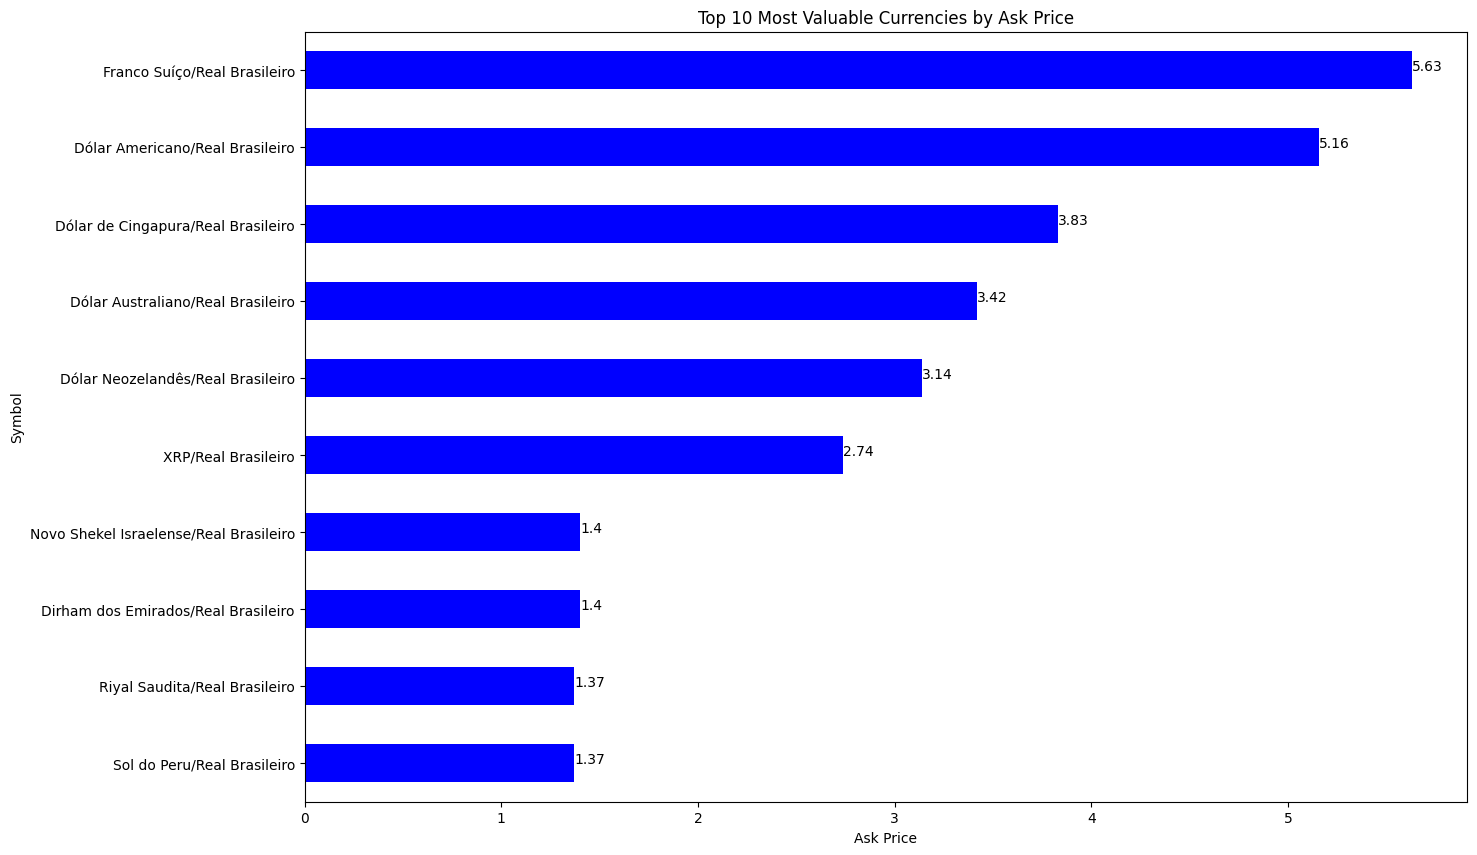

In [16]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by name
    order by avg(ask) desc limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=True, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.2 What is the TOP 10 locations BRL has + value?

posx and posy should be finite values
posx and posy should be finite values


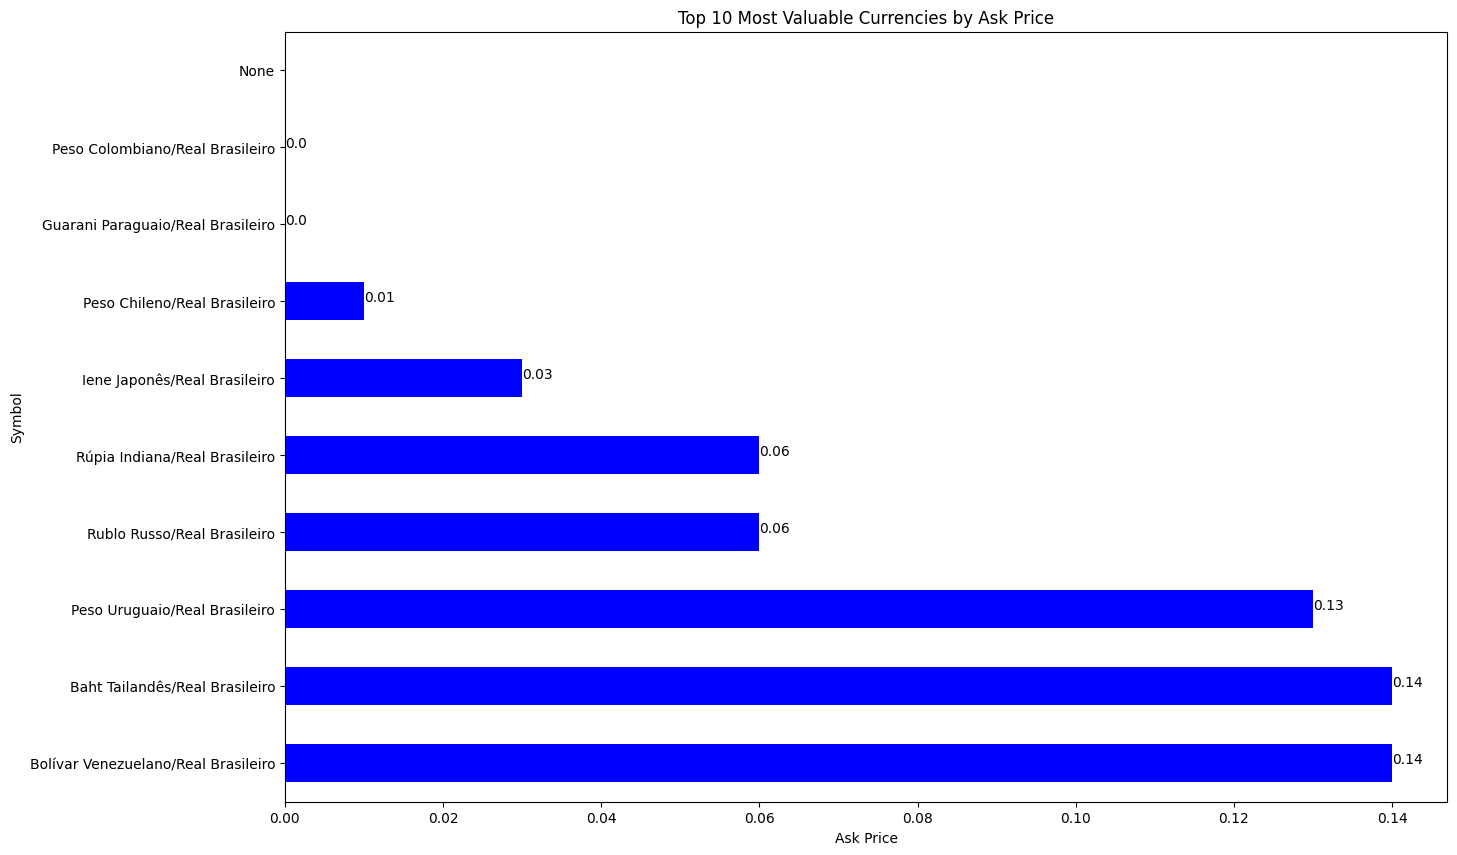

In [17]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC')
    group by name
    order by avg(ask) limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.3 What the top 10 like BRL in value?

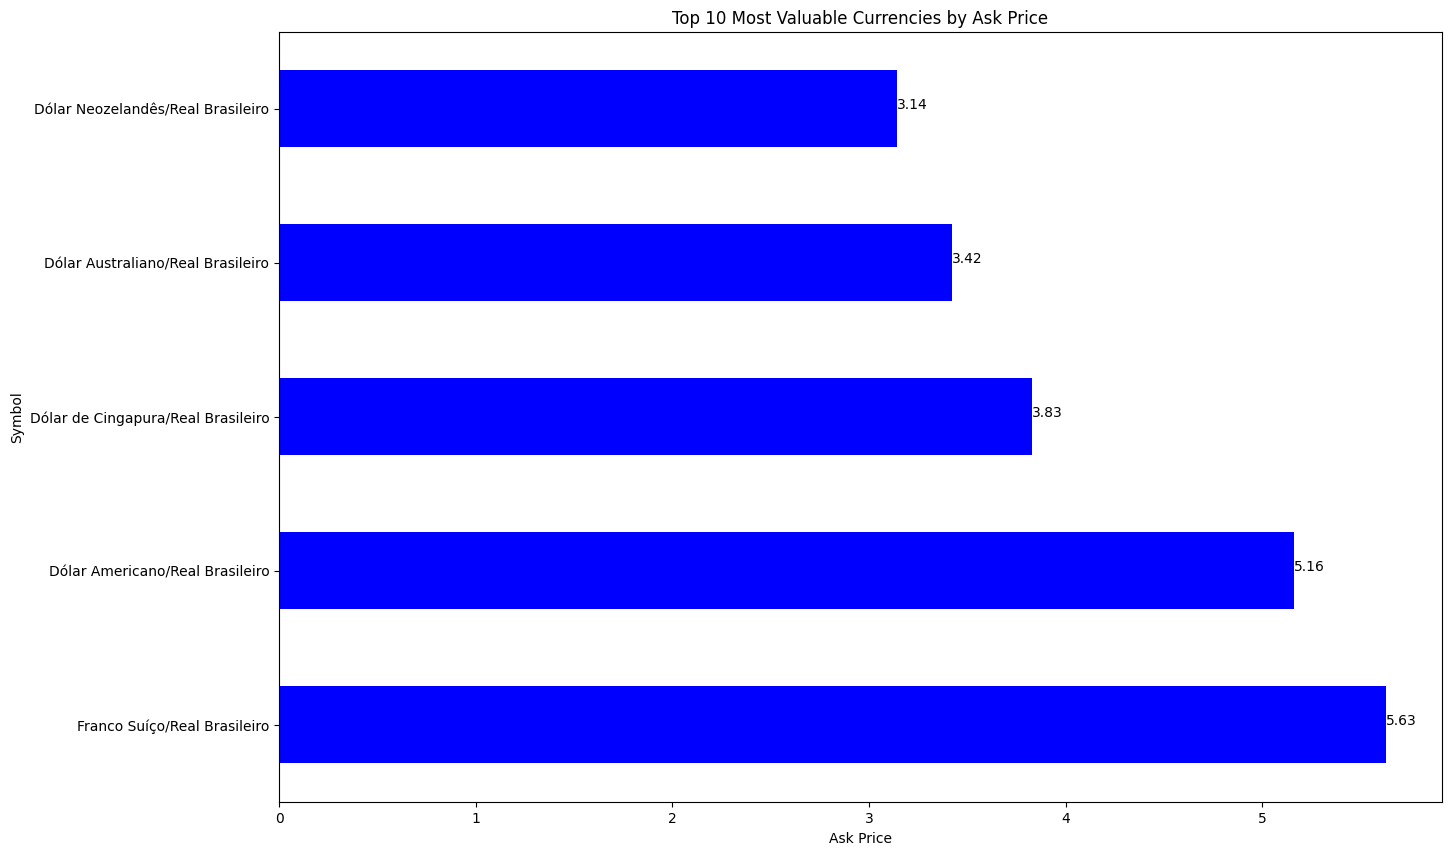

In [18]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    and ask >=1
    group by name
    order by avg(ask) desc limit 5
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.4 Average Ask By Day

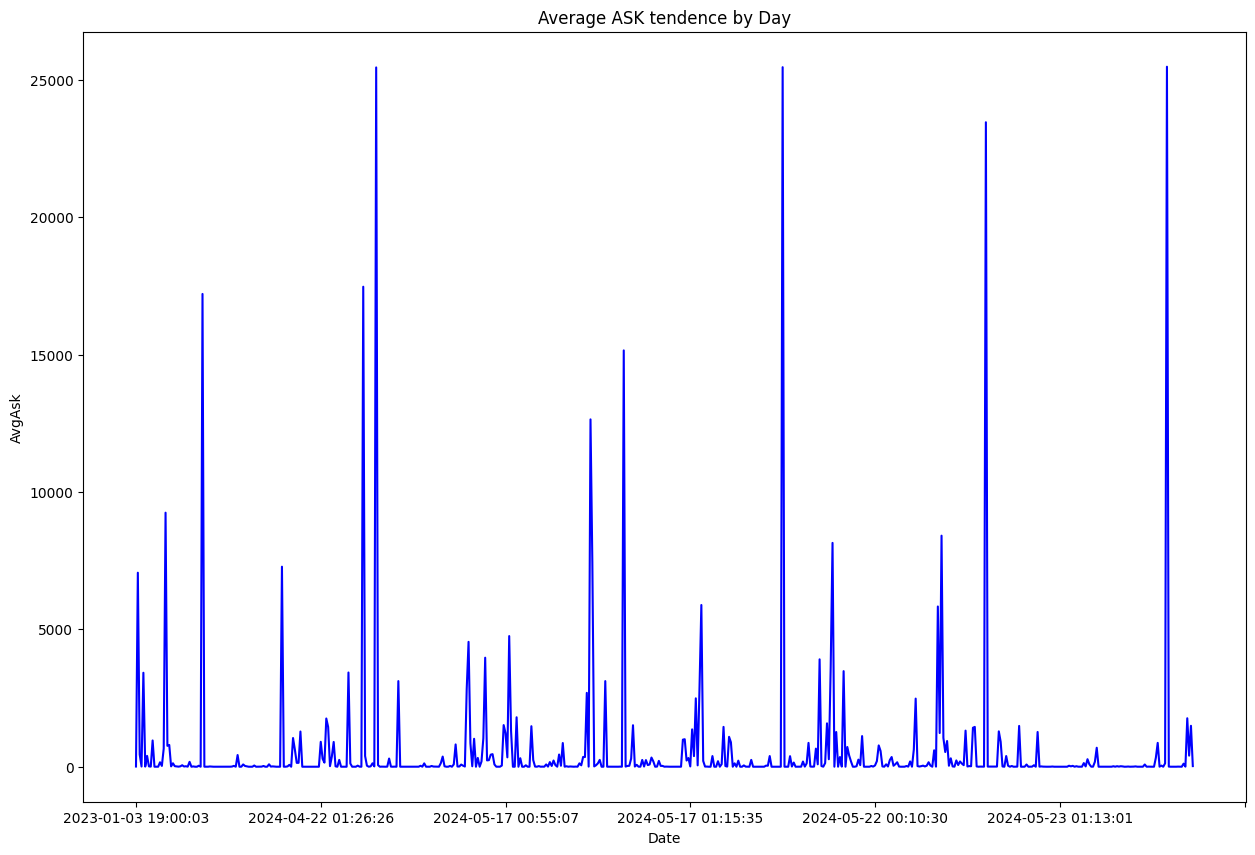

In [19]:

import matplotlib.pyplot as plt

## Query to get the average ASK and BID by day
query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='DT_REF', ascending=True, inplace=True)

cht = newDf.plot(
    kind='line', x='DT_REF', y='AvgAsk',
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Average ASK tendence by Day', xlabel='Date', ylabel='AvgAsk')

#exibir o grafico
plt.show()

4.5 Average Bid By Day

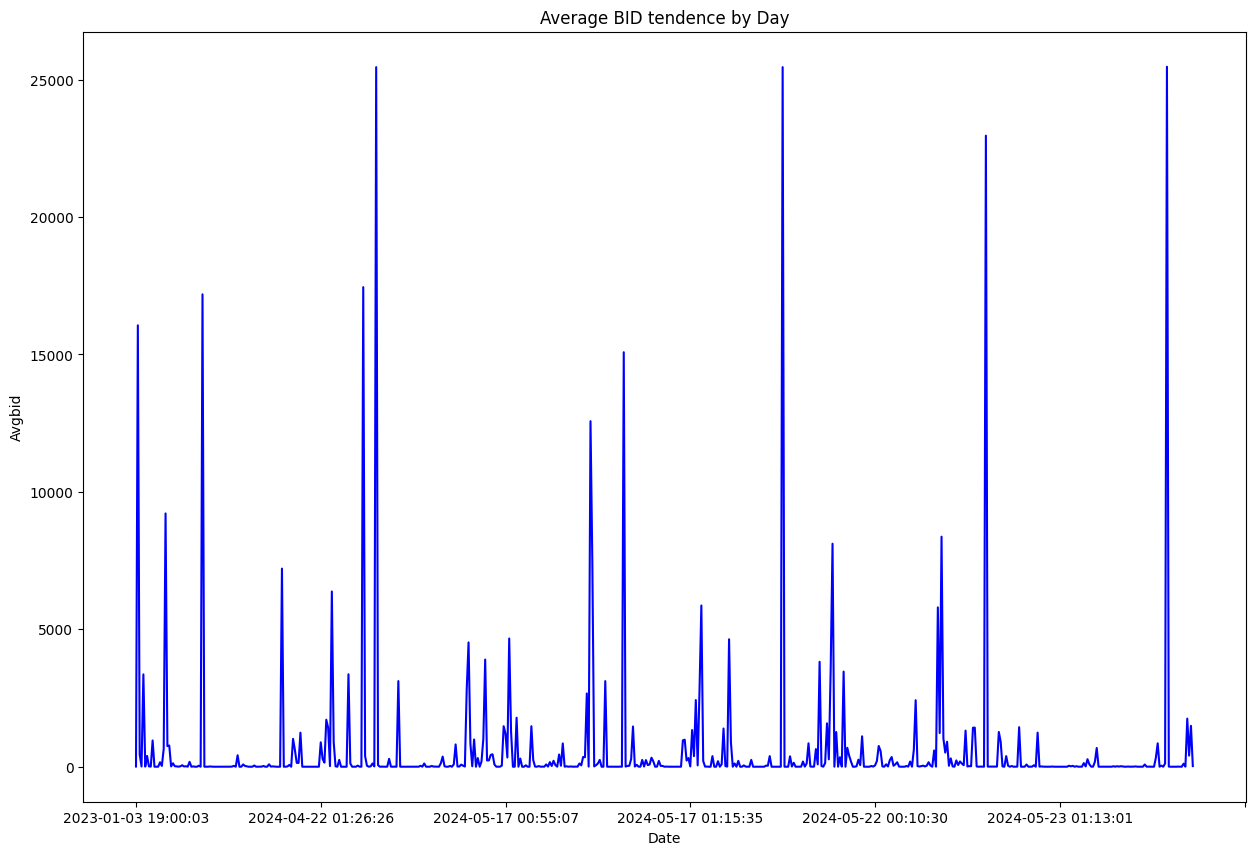

In [20]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='DT_REF', ascending=True, inplace=True)

cht = newDf.plot(
    kind='line', x='DT_REF', y='Avgbid',
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Average BID tendence by Day', xlabel='Date', ylabel='Avgbid')

#exibir o grafico
plt.show()